# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [62]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
warnings.filterwarnings('ignore')

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [2]:
df = pd.read_csv('RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.shape

(12316, 32)

In [4]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [6]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [7]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [9]:
df.sample(4)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
7916,8:00:00,Wednesday,18-30,Male,High school,Employee,2-5yr,Stationwagen,Owner,5-10yrs,...,Going straight,Pedestrian,Female,31-50,3,NaN,NaN,Crossing from nearside - masked by parked or s...,Overtaking,Slight Injury
6438,13:46:00,Thursday,Over 51,Male,High school,Employee,1-2yr,NaN,Owner,2-5yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Serious Injury
5532,14:33:00,Sunday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Organization,5-10yrs,...,Going straight,Passenger,Female,Under 18,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
11955,22:25:00,Thursday,31-50,Male,Above high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Going straight,Pedestrian,Male,31-50,3,NaN,NaN,Crossing from driver's nearside,Driving carelessly,Slight Injury


In [10]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [11]:
df.duplicated().sum()

np.int64(0)

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [46]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle           0
Defect_of_vehicle                 0
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [20]:
print(df['Educational_level'].unique())
df['Educational_level'] = df['Educational_level'].fillna("Unknown")
df['Educational_level'].isnull().sum()

['Above high school' 'Junior high school' 'Unknown' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']


np.int64(0)

In [25]:
print(df['Vehicle_driver_relation'].unique())
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].replace('Other', 'Unknown')
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].fillna('Unknown')
df['Vehicle_driver_relation'].isnull().sum()

['Employee' 'Unknown' 'Owner' nan]


np.int64(0)

In [28]:
print(df['Driving_experience'].unique())
df['Driving_experience'] = df['Driving_experience'].replace('unknown', 'Unknown')
df['Driving_experience'] = df['Driving_experience'].fillna('Unknown')
df['Driving_experience'].isnull().sum()

['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']


np.int64(0)

In [31]:
print(df['Type_of_vehicle'].unique())
df['Type_of_vehicle'] = df['Type_of_vehicle'].fillna('Other')
df['Type_of_vehicle'].isnull().sum()

['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']


np.int64(0)

In [37]:
print(df['Owner_of_vehicle'].unique())
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].fillna('Other')
df['Owner_of_vehicle'].isnull().sum()

['Owner' 'Governmental' nan 'Organization' 'Other']


np.int64(0)

In [40]:
print(df['Service_year_of_vehicle'].unique())
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].fillna('Unknown')
df['Service_year_of_vehicle'].isnull().sum()

['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']


np.int64(0)

In [45]:
print(df['Defect_of_vehicle'].unique())
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0])
df['Defect_of_vehicle'].isnull().sum()

['No defect' '7' '5']


np.int64(0)

In [63]:
# Filling with mode() anything that is under ~400 nulls

df['Area_accident_occured'] = df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0])
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0])
df['Road_allignment'] = df['Road_allignment'].fillna(df['Road_allignment'].mode()[0])
df['Road_surface_type'] = df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0])
df['Type_of_collision'] = df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0])
df['Vehicle_movement'] = df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0])
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [53]:
print(df['Types_of_Junction'].value_counts())
df['Types_of_Junction'] = df['Types_of_Junction'].replace('Unknown', 'Other')
df['Types_of_Junction'] = df['Types_of_Junction'].fillna('Other')
df['Types_of_Junction'].isnull().sum()

Types_of_Junction
Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: count, dtype: int64


np.int64(0)

In [56]:
print(df['Work_of_casuality'].unique())
df['Work_of_casuality'] = df['Work_of_casuality'].replace('Unknown', 'Other')
df['Work_of_casuality'] = df['Work_of_casuality'].fillna('Other')
df['Work_of_casuality'].isnull().sum()

[nan 'Driver' 'Other' 'Unemployed' 'Employee' 'Self-employed' 'Student'
 'Unknown']


np.int64(0)

In [59]:
print(df['Fitness_of_casuality'].unique())
print(df['Fitness_of_casuality'].value_counts())
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].replace('NormalNormal', 'Normal')
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].fillna('Normal')
df['Fitness_of_casuality'].isnull().sum()

[nan 'Normal' 'Deaf' 'Other' 'Blind' 'NormalNormal']
Fitness_of_casuality
Normal          9608
NormalNormal      19
Deaf              18
Other             18
Blind             18
Name: count, dtype: int64


np.int64(0)

In [60]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [105]:
df.sample(20)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
857,16:10:00,Monday,31-50,Male,Junior high school,Owner,5-10yr,Lorry (41?100Q),Owner,Unknown,...,U-Turn,na,na,na,2,Other,Normal,Not a Pedestrian,Moving Backward,Slight Injury
6785,11:19:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Other,Pedestrian,Female,31-50,3,Other,Normal,Unknown or other,Moving Backward,Slight Injury
4184,14:28:00,Saturday,31-50,Male,Illiterate,Employee,2-5yr,Unknown,Owner,2-5yrs,...,Getting off,Passenger,Female,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
4822,20:50:00,Monday,31-50,Male,Elementary school,Employee,5-10yr,Long lorry,Owner,5-10yrs,...,Going straight,Passenger,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
3524,18:44:00,Sunday,31-50,Male,Junior high school,Owner,2-5yr,Pick up upto 10Q,Owner,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Unknown or other,No priority to vehicle,Slight Injury
7959,17:00:00,Thursday,18-30,Male,Junior high school,Employee,No Licence,Automobile,Owner,Unknown,...,Moving Backward,na,na,na,2,Other,Normal,Not a Pedestrian,No distancing,Slight Injury
1041,8:28:00,Sunday,18-30,Male,Unknown,Unknown,Unknown,Unknown,Other,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
11739,18:13:00,Tuesday,31-50,Male,Junior high school,Employee,1-2yr,Unknown,Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overturning,Serious Injury
4116,13:00:00,Friday,Unknown,Male,Above high school,Owner,2-5yr,Lorry (41?100Q),Owner,5-10yrs,...,Other,Driver or rider,Male,Under 18,3,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
9441,20:00:00,Thursday,31-50,Male,Junior high school,Employee,1-2yr,Taxi,Owner,5-10yrs,...,Going straight,na,na,na,2,Other,Normal,Not a Pedestrian,No priority to pedestrian,Serious Injury


In [102]:
print(df['Casualty_severity'].value_counts())
print(df['Casualty_severity'].dtype)
df['Casualty_severity'] = df['Casualty_severity'].replace(-1, np.nan)
df['Casualty_severity'] = df['Casualty_severity'].fillna(2)
df['Casualty_severity'] = df['Casualty_severity'].astype(int)
print(df['Casualty_severity'].dtype)
df['Casualty_severity'].isnull().sum()

Casualty_severity
3    7076
2    5214
1      26
Name: count, dtype: int64
int64
int64


np.int64(0)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  int64 
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

In [104]:
df.select_dtypes(exclude=['number'])

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Collision with roadside-parked vehicles,Going straight,na,na,na,Other,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Vehicle with vehicle collision,Going straight,na,na,na,Other,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Collision with roadside objects,Going straight,Driver or rider,Male,31-50,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Vehicle with vehicle collision,Going straight,Pedestrian,Female,18-30,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,5-10yrs,...,Vehicle with vehicle collision,Going straight,na,na,na,Other,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Unknown,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,...,Vehicle with vehicle collision,Going straight,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,Vehicle with vehicle collision,Other,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Vehicle with vehicle collision,Other,Driver or rider,Male,31-50,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Vehicle with vehicle collision,Other,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [119]:
# Initialize LabelEncoder
le = LabelEncoder()

# Label encode 'Fuel_Type' column
df['Sex_of_driver'] = le.fit_transform(df['Sex_of_driver'])


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

<BarContainer object of 12316 artists>

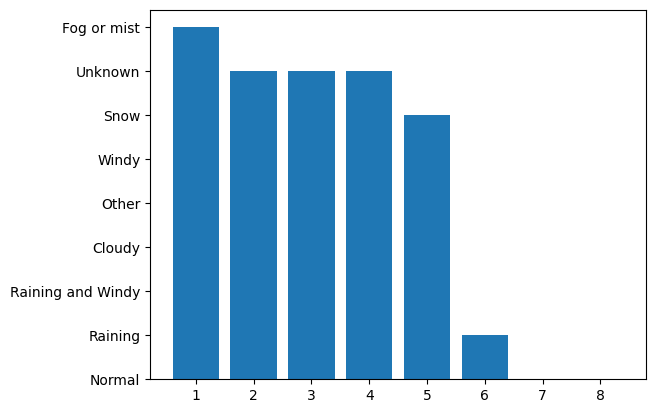

In [115]:
plt.bar(df['Number_of_casualties'], df['Weather_conditions'])

(array([11437.,     0.,     0.,     0.,     0.,   701.,     0.,     0.,
            0.,   178.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

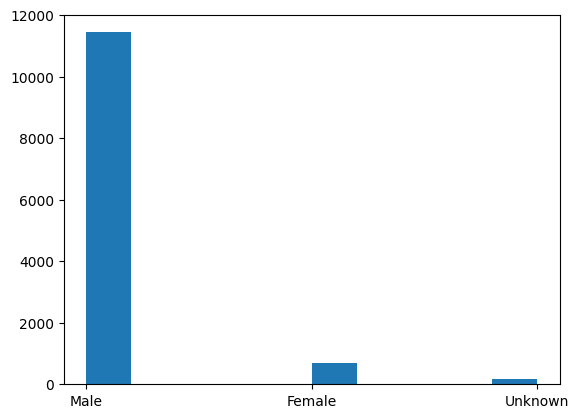

In [116]:
plt.hist(df['Sex_of_driver'])

(array([4271.,    0., 4087.,    0.,    0.,  825.,    0., 1585.,    0.,
        1548.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

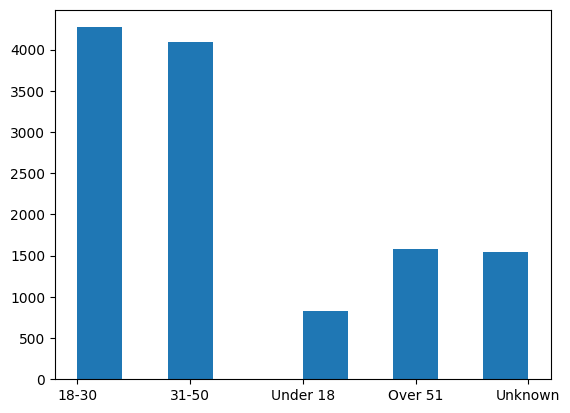

In [117]:
plt.hist(df['Age_band_of_driver'])

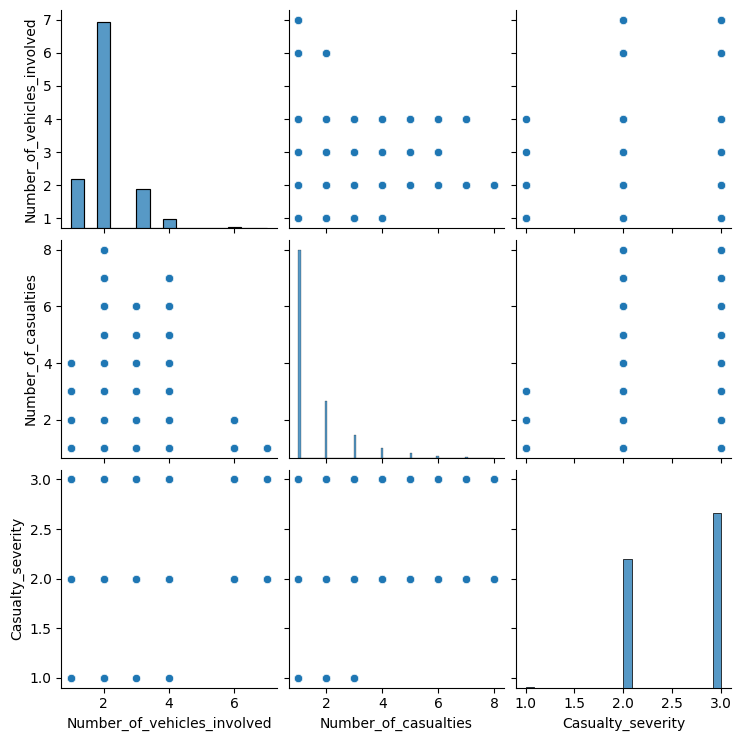

In [118]:
sns.pairplot(df)

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


x = df[['Sex_of_driver', 'Casualty_severity', 'Number_of_casualties', 'Number_of_vehicles_involved']]
y = df['Accident_severity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
result_lr = lr.fit(x_train,y_train)
lr_ypred = result_lr.predict(x_test)
score = result_lr.score(x_train, y_train)
score

0.8465286236297198

#### Decision Tree Classifier

In [142]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
result_dtre = dtree.fit(x_train,y_train)
dtree_ypred = result_dtre.predict(x_test)
score_dtree = result_dtre.score(x_train,y_train)
score_dtree

0.8485586682907024

#### Support Vector Machine (SVM)

In [144]:
from sklearn import svm
sv = svm.SVC()
result_svm = sv.fit(x_train,y_train)
svm_ypred = result_svm.predict(x_test)
score_sv = result_svm.score(x_train, y_train)
score_sv

0.8473406414941129

#### K-Neighbors Classifier

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
result_knn = knn.fit(x_train,y_train)
knn_ypred = result_knn.predict(x_test)
score_knn = result_knn.score(x_train, y_train)
score_knn


0.8121193666260658

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

---

### Logistic Regression

In [147]:
# for Logistic Regression
score1 = accuracy_score(y_test,lr_ypred)
score1

0.8421266233766234

In [151]:
confusion_matrix(y_test,lr_ypred)

array([[   0,    0,   31],
       [   0,    0,  358],
       [   0,    0, 2075]])

In [167]:
precision_score(y_test, lr_ypred, average='micro')

np.float64(0.8421266233766234)

In [159]:
recall_score(y_test, lr_ypred, average='micro')

np.float64(0.8421266233766234)

In [164]:
f1_score(y_test, lr_ypred, average='macro')

np.float64(0.3047661011970331)

---

### Decision Tree

In [148]:
# for Decision Tree
score2 = accuracy_score(y_test,dtree_ypred)
score2

0.8469967532467533

In [152]:
confusion_matrix(y_test,dtree_ypred)

array([[   0,    0,   31],
       [   0,   17,  341],
       [   0,    5, 2070]])

In [173]:
precision_score(y_test, dtree_ypred, average='micro')

np.float64(0.8469967532467533)

In [172]:
recall_score(y_test, dtree_ypred, average='micro')

np.float64(0.8469967532467533)

In [176]:
f1_score(y_test, dtree_ypred, average='macro')

np.float64(0.3353370697054791)

---

### SVM

In [149]:
# for SVM
score3 = accuracy_score(y_test,svm_ypred)
score3

0.8433441558441559

In [153]:
confusion_matrix(y_test,svm_ypred)

array([[   0,    0,   31],
       [   0,    3,  355],
       [   0,    0, 2075]])

In [171]:
precision_score(y_test, svm_ypred, average='micro')

np.float64(0.8433441558441559)

In [170]:
recall_score(y_test, svm_ypred, average='micro')

np.float64(0.8433441558441559)

In [175]:
f1_score(y_test, svm_ypred, average='macro')

np.float64(0.31050783228376333)

---

### KNN

In [150]:
# for KNN
score4 = accuracy_score(y_test,knn_ypred)
score4

0.817775974025974

In [154]:
confusion_matrix(y_test,knn_ypred)

array([[   0,    3,   28],
       [   0,   62,  296],
       [   0,  122, 1953]])

In [169]:
precision_score(y_test, knn_ypred, average='micro')

np.float64(0.817775974025974)

In [168]:
recall_score(y_test, knn_ypred, average='micro')

np.float64(0.817775974025974)

In [174]:
f1_score(y_test, knn_ypred, average='macro')

np.float64(0.37501377271091924)

---